In [22]:
import os
import pandas as pd
import matplotlib.pyplot as plt

path = os.getcwd() + "/data/output/"
dirs = [path + d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
dirs.sort()
fullpath = dirs[-1]
fullpath += "/output.csv"
#fullpath = '/home/lollo/Documents/python/siv/SIV_project/data/output/run_1710931647/output.csv' 
data = pd.read_csv(fullpath)



RUN all methods 10, 100, 1000, 3000, 6000 feat
'/home/lollo/Documents/python/siv/SIV_project/data/output/run_1710931647/output.csv' 

In [23]:
data.sort_values("err_avg")

,name,fm,matcher,nfeat,scale,denoise,err_avg,err_std,err_max,steps_sec
9,SIFT_FLANN_LOWE_150_1.0_5,SIFT,FLANN_LOWE,150,1.0,5,0.34,0.14,0.89,12
1,SIFT_FLANN_LOWE_150_1.0_0,SIFT,FLANN_LOWE,150,1.0,0,0.34,0.14,0.91,13
3,ORB_FLANN_3500_1.0_5,ORB,FLANN,3500,1.0,5,0.35,0.14,0.90,13
5,ORB_FLANN_3500_1.0_3,ORB,FLANN,3500,1.0,3,0.35,0.14,0.86,13
8,ORB_FLANN_3500_1.0_0,ORB,FLANN,3500,1.0,0,0.34,0.15,0.91,13
10,SIFT_FLANN_LOWE_150_1.0_3,SIFT,FLANN_LOWE,150,1.0,3,0.33,0.15,0.89,13
7,ORB_FLANN_3500_0.5_0,ORB,FLANN,3500,0.5,0,0.40,0.16,0.89,24
0,ORB_FLANN_3500_0.5_3,ORB,FLANN,3500,0.5,3,0.39,0.16,0.89,30
2,SIFT_FLANN_LOWE_150_0.5_0,SIFT,FLANN_LOWE,150,0.5,0,0.38,0.17,0.91,31
6,SIFT_FLANN_LOWE_150_0.5_5,SIFT,FLANN_LOWE,150,0.5,5,0.37,0.16,0.89,32


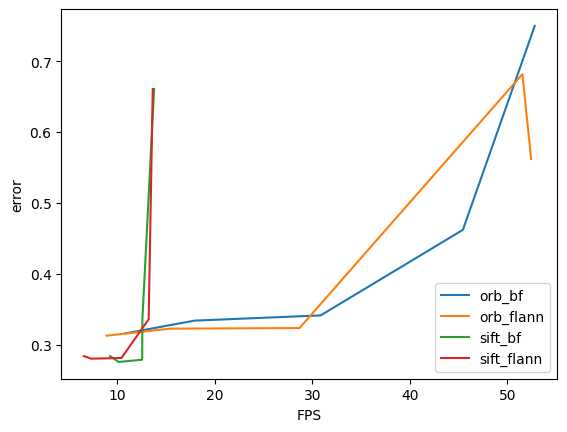

In [17]:
orb_knn = data[(data["fm"] == "ORB") & (data["matcher"] == "KNN")].sort_values("steps_sec")
orb_flann = data[(data["fm"] == "ORB") & (data["matcher"] == "FLANN")].sort_values("steps_sec")
sift_knn = data[(data["fm"] == "SIFT") & (data["matcher"] == "KNN")].sort_values("steps_sec")
sift_flann = data[(data["fm"] == "SIFT") & (data["matcher"] == "FLANN_LOWE")].sort_values("steps_sec")

plt.plot(
    orb_knn["steps_sec"],
    orb_knn["err_avg"],
    label="orb_bf",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    orb_flann["steps_sec"],
    orb_flann["err_avg"],
    label="orb_flann",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    sift_knn["steps_sec"],
    sift_knn["err_avg"],
    label="sift_bf",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns
plt.plot(
    sift_flann["steps_sec"],
    sift_flann["err_avg"],
    label="sift_flann",
)  # Replace 'x_column1' and 'y_column1' with the names of your columns



# Add labels and title
plt.xlabel("FPS")  # Replace 'X-axis label' with the label for the x-axis
plt.ylabel("error")  # Replace 'Y-axis label' with the label for the y-axis

# Add a legend
plt.legend()

# Display the plot
plt.show()